<h1 style="border: 1px solid black; border-radius: 20px; text-align: center; padding : 10px;">
    
    Élégance et Stratégie : Maximiser les Conversions de Clients Passifs en Prêts Personnels

</h1>


# Context 

Ce dossier concerne une banque (Thera Bank) qui possède une clientèle croissante. La majorité de ces clients sont des clients passifs (déposants) avec des montants de dépôts variables. Le nombre de clients emprunteurs (actifs) est assez faible, et la banque souhaite développer cette base rapidement pour attirer plus d'activités de prêt et ainsi, générer davantage de revenus grâce aux intérêts sur les prêts. En particulier, la direction souhaite explorer des moyens de convertir ses clients passifs en clients de prêts personnels (tout en les conservant en tant que déposants). Une campagne menée par la banque l'année dernière auprès des clients passifs a montré un taux de conversion sain de plus de 9% de réussite. Cela a encouragé le département du marketing de détail à concevoir des campagnes pour cibler mieux le marketing afin d'augmenter le taux de réussite avec un budget minimal.

Le département souhaite construire un modèle qui les aidera à identifier les clients potentiels ayant une probabilité plus élevée d'acheter le prêt. Cela augmentera le taux de réussite tout en réduisant le coût de la campagne.

dataset source : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

# 1 Importation

In [1]:
## 1.1 Importation des bibliotheques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# On verifier que les bibliotheques sont importes
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)


Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


## 1.2 Importation des donnees 

In [4]:
df = pd.read_csv('bank_personal_loan.csv', delimiter=';')

In [5]:
df.sample()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1498,1499,49,23,125,94022,1,7.3,1,0,0,0,0,0,0


## 1.3 Dictionnaire de dataset

- **Customer ID** : Numéro d'identification unique attribué à chaque client.
- **Age** : Âge du client en années complètes.
- **Experience** : Nombre d'années d'expérience professionnelle.
- **Income** : Revenu annuel du client en milliers de dollars.
- **ZIPCode** : Code postal de l'adresse domicile du client.
- **Family** : Nombre de membres dans la famille du client.
- **CCAvg** : Dépense mensuelle moyenne sur les cartes de crédit en milliers de dollars.
- **Education** : Niveau d'éducation atteint par le client. (1 : Licence ; 2 : Diplômé ; 3 : Avancé/Professionnel)
- **Mortgage** : Valeur de l'hypothèque de la maison du client, le cas échéant, en milliers de dollars.
- **Personal Loan** : Indique si le client a accepté le prêt personnel proposé lors de la dernière campagne. (Oui/Non)
- **Securities Account** : Indique si le client possède un compte de valeurs mobilières auprès de la banque. (Oui/Non)
- **CD Account** : Indique si le client possède un compte de dépôt à terme (CD) auprès de la banque. (Oui/Non)
- **Online** : Indique si le client utilise les services de banque en ligne. (Oui/Non)
- **CreditCard** : Indique si le client utilise une carte de crédit émise par UniversalBank. (Oui/Non)

## 1.4 Parametres global

In [6]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']
colors = ['#003049', '#D62828', '#F77F00', '#FCBF49', '#EAE2B7']

# 2. Etude des donnees 

## 2.1 df.head(), df.tail() et df.sample()

La commande df.head() permet de recuperer par default les 5 premiers lignes, si on veut recuperer les n derniers lignes, on utilise la commande df.tail(n) 

La commande sample() permet de recuperer par default un example aleatoire de notre dataset, on peut aussi specifier le nombre des observations a recuperer 

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
df.sample(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1511,1512,58,32,65,90266,3,2.2,3,0,0,0,0,0,0
2293,2294,42,17,14,91768,2,0.1,2,0,0,0,0,1,0
738,739,36,10,80,94596,4,2.2,2,0,0,0,0,1,0


## 2.2 Structure des nos donnees 

La commande df.info() nous permet de s'informer de la structure generale de notre dataset, parmit les informations on a:
- Les types des donnees.
- Nombres des colonnes.
- Nombres des valuers manquants pour chaque colonnes.
- Nombre des lignes en total

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Les remarques les plus importantes depuis cette fonction `info()`
- Le DataFrame contient un total de 5000 entrées.
- Il y a 14 colonnes au total.
- Aucune des colonnes ne contient de valeurs nulles (non-null count est de 5000 pour toutes les colonnes), ce qui signifie qu'il n'y a pas de données manquantes dans le jeu de données.
- Les types de données des colonnes sont les suivants :
  - Les colonnes ID, Age, Experience, Income, ZIP Code, Family, Mortgage, Personal Loan, Securities Account, CD Account, Online et CreditCard sont de type entier (int64).
  - La colonne CCAvg est de type flottant (float64).

## 2.3 Donnees manquantes 

La fonction `isna()` est utilisée pour vérifier chaque élément du DataFrame et renvoie un DataFrame de la même forme, mais avec des valeurs booléennes indiquant True là où les valeurs sont NaN (Not a Number) et False là où les valeurs sont non-NaN.

Ensuite, la fonction `sum()` est appliquée à ce DataFrame résultant. Lorsque vous appelez `sum()` sur un DataFrame de valeurs booléennes, chaque valeur True est interprétée comme 1 et chaque valeur False est interprétée comme 0. Ainsi, `sum()` retourne la somme de ces valeurs, indiquant le nombre total de valeurs True pour chaque colonne.

In [11]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

La sortie de `df.isna().sum()` indique le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame. Dans ce cas précis :

- La colonne "ID" n'a aucune valeur manquante.
- De même, aucune des autres colonnes (`Age`, `Experience`, `Income`, `ZIP Code`, `Family`, `CCAvg`, `Education`, `Mortgage`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, `CreditCard`) n'a de valeurs manquantes.

Cela suggère que le jeu de données est complet, sans aucune valeur manquante dans toutes les colonnes.

## 2.4 Donnees dupliquer

La commande df.duplicated().sum() permet de calculer le nombre des entrees dupliquer dans notre dataset.

In [12]:
df.duplicated().sum()

0

    Cela suggere qu'on a aucun observation dupliquer dans notre dataset

# 3. Visualisation

La visualisation des données est cruciale pour comprendre la distribution et les relations entre les variables. Elle permet d'identifier des tendances et des corrélations, souvent invisibles dans les données brutes. La communication des découvertes est également facilitée par des graphiques et des diagrammes, permettant des décisions éclairées et des stratégies fondées sur une compréhension approfondie des données.


## 3.1 Répartition des tranches d'âge

In [13]:
# Creation d'une fonctions pour creer des tranches des ages
def age_tranche(df, decalage=10):
    '''
    Les tranches sont réparties selon un décalage de 10 ans par défaut
    '''
    # Calcul du nombre de tranches en fonction de l'âge maximal dans le DataFrame
    nb_tranches = int(np.ceil(df['Age'].max() / decalage))
    
    # Création d'un tableau d'entiers pour stocker le nombre d'âges dans chaque tranche
    tranches = np.zeros(nb_tranches, dtype=int)
    
    # Calcul du nombre d'âges dans chaque tranche
    for age in df['Age']:
        tranche_index = int(age / decalage)  # Calcul de l'indice de la tranche
        tranches[tranche_index] += 1         # Incrémentation du nombre d'âges dans la tranche
    
    return tranches

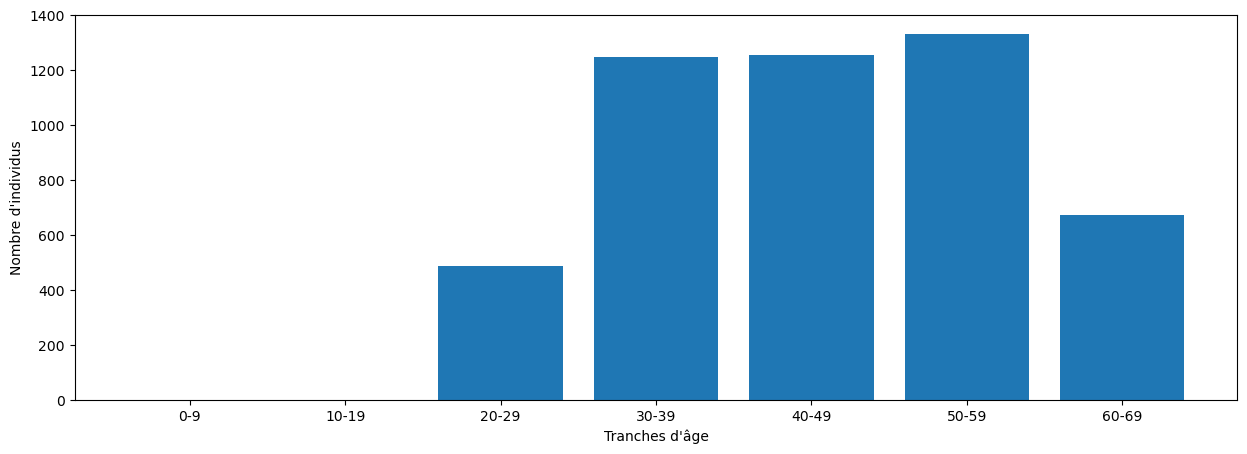

In [14]:
ages = age_tranche(df)

# Tracé de l'histogramme
plt.figure(figsize=(15, 5))
plt.bar(range(len(ages)), ages)

plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'individus')

plt.xticks(range(len(ages)), [f'{i*10}-{(i+1)*10-1}' for i in range(len(ages))])

# Affichage du graphique
plt.show()


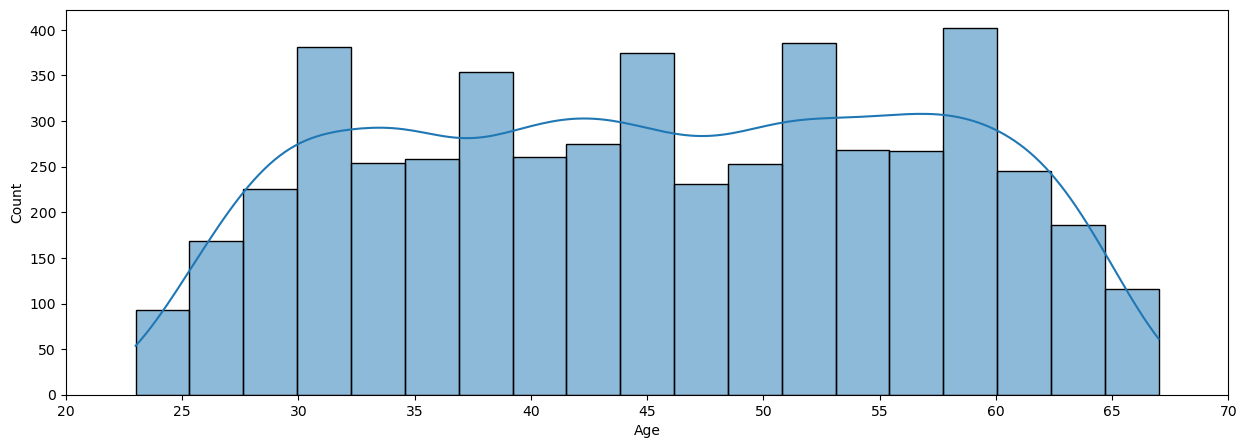

In [15]:
plt.figure(figsize = (15,5) ) 

sns.histplot(data = df , x = 'Age', kde=True)
plt.xticks(range(20,71,5))
plt.show()

<i>Remarques</i>
1. Les deux premiers groupes d'âge ne contiennent aucun individu (compte de 0). Cela suggère qu'il n'y a aucun individu dans le jeu de données dans la plage d'âge couverte par ces groupes.

2. Les groupes d'âge avec les comptes les plus élevés sont ceux correspondant aux âges de 20 à 29 ans, 30 à 39 ans et 40 à 49 ans. Cela indique que le jeu de données contient un nombre significatif d'individus dans ces tranches d'âge.

3. Les comptes diminuent progressivement à mesure que l'âge augmente au-delà de 40-49 ans. Cela est attendu car les gens ont tendance à prendre leur retraite ou à être moins représentés dans les groupes d'âge plus avancés.

4. On observe une légère augmentation à nouveau dans le compte pour le dernier groupe d'âge (70 à 79 ans). Cela pourrait être dû à des individus qui vivent plus longtemps ou qui restent actifs à un âge avancé.

5. Dans l'ensemble, la distribution semble être inclinée vers les groupes d'âge plus jeunes, avec une diminution des comptes pour les groupes d'âge plus âgés, ce qui est une tendance démographique courante dans de nombreuses populations.

## 3.2 Distribution des clients selon leur revenu

In [16]:
# determination des tranches des revenu
def income_tranche(df, decalage = 10):
    nb_tranches = int( np.ceil( df['Income'].max() / decalage) )
    tranches = np.zeros(nb_tranches , dtype = int)
    for income in df['Income']:
        tranche_index = int( income / decalage ) 
        tranches[tranche_index] += 1
    return tranches

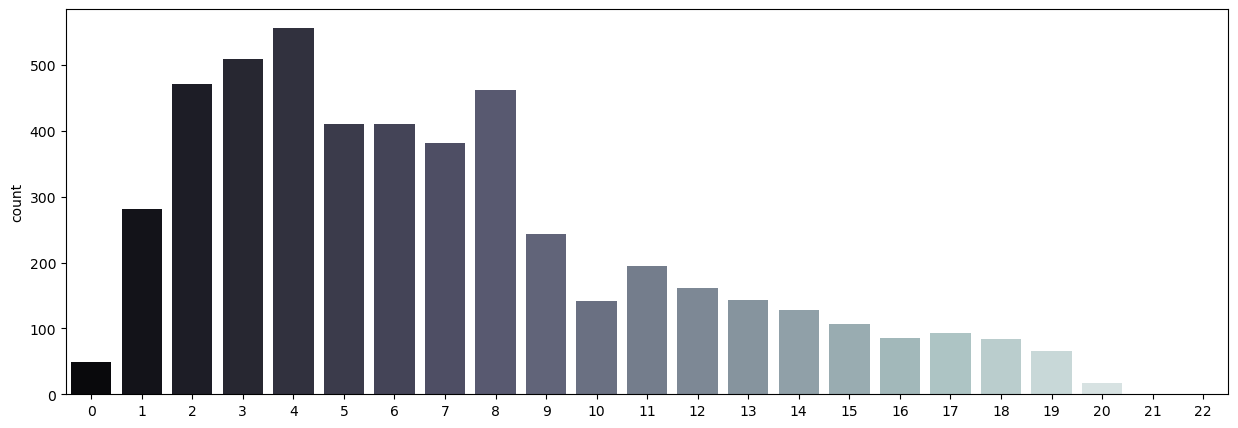

In [17]:
income = income_tranche(df)

income_df = pd.DataFrame({'count': income})

plt.figure(figsize = (15,5) )

sns.barplot(data = income_df, x =income_df.index , y = 'count', palette = palettes[13])

plt.yscale('linear')

plt.show()

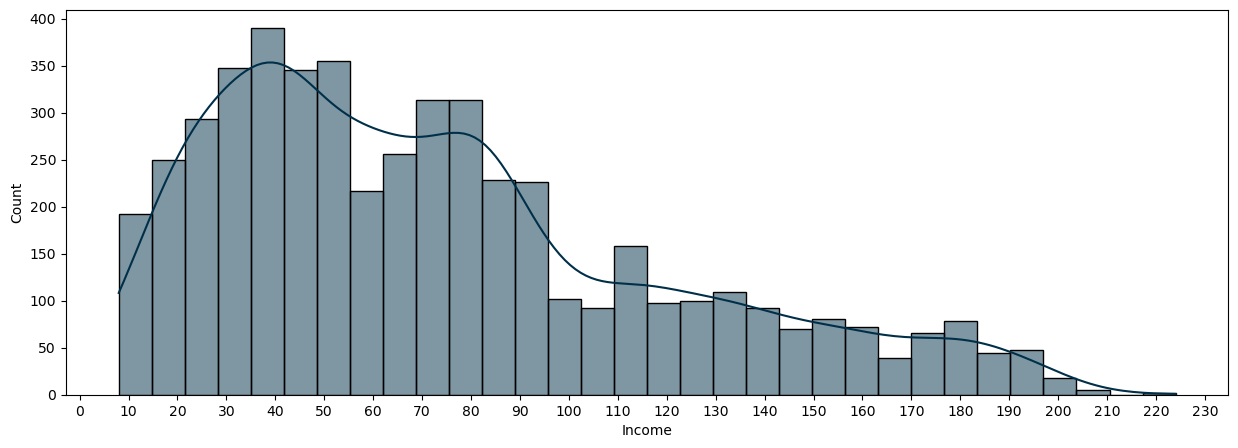

In [18]:
plt.figure(figsize = (15,5))

sns.histplot(data = df , x = 'Income', kde = True, color = colors[0])
plt.xticks(range(0,231,10))
plt.show()

<i>Remarques : </i>
    En analysant la distribution des revenus des clients avec un décalage de 10 (revenu annuel du client en milliers de dollars), voici quelques observations :

1. Le nombre le plus élevé de clients se situe dans les tranches de revenu de 40k à 50k, 50k à 60k et 60k à 70k. Cela suggère que la majorité des clients ont un revenu annuel compris entre 40 000 et 70 000 dollars.

2. Le nombre de clients diminue progressivement à mesure que le revenu augmente au-delà de 70k. Cela indique qu'il y a moins de clients avec des revenus plus élevés.

3. Il y a très peu de clients dans les tranches de revenu les plus élevées, comme ceux au-dessus de 90k. Cela suggère qu'il y a une proportion relativement faible de clients à revenu élevé dans l'échantillon de données.

4. Il y a une tranche de revenu avec seulement 17 clients et une autre avec seulement 1 client, ce qui indique des groupes de revenus moins représentés dans l'échantillon.

5. Dans l'ensemble, la distribution des revenus semble être biaisée vers des revenus modérés à moyens, avec relativement peu de clients dans les tranches de revenus les plus élevées. Cela peut avoir des implications pour la segmentation de la clientèle et les stratégies de marketing ciblées.

## 3.3 Localisation des clients

In [19]:
len(df['ZIP Code'].unique())

467

On remarque qu'il existe uniquement `467 ZIP Code unique` dans notre data, tandis qu'ont a collecter des informations a propos de 5000 clients.
On deduit qui les clients partage leur enviromenent.

In [20]:
zip_code_grouped = df.groupby('ZIP Code').size()

zip_code_df = pd.DataFrame({'count': zip_code_grouped}).reset_index()
zip_code_df

,ZIP Code,count
0,9307,1
1,90005,5
2,90007,6
3,90009,8
4,90011,3
...,...,...
462,96091,4
463,96094,2
464,96145,1
465,96150,4


On remarque qu'il existe un code postal tres different des autres, ce qui rendre la visualisation en peu etoiler vers les extermites. Donc on doit eliminer cette observation de notre visualisation pour qu'on a une vision claire de nos donnees.

In [21]:
zip_code_df = zip_code_df.drop(zip_code_df[zip_code_df['ZIP Code'] == 9307].index)

In [22]:
zip_code_df

,ZIP Code,count
1,90005,5
2,90007,6
3,90009,8
4,90011,3
5,90016,2
...,...,...
462,96091,4
463,96094,2
464,96145,1
465,96150,4


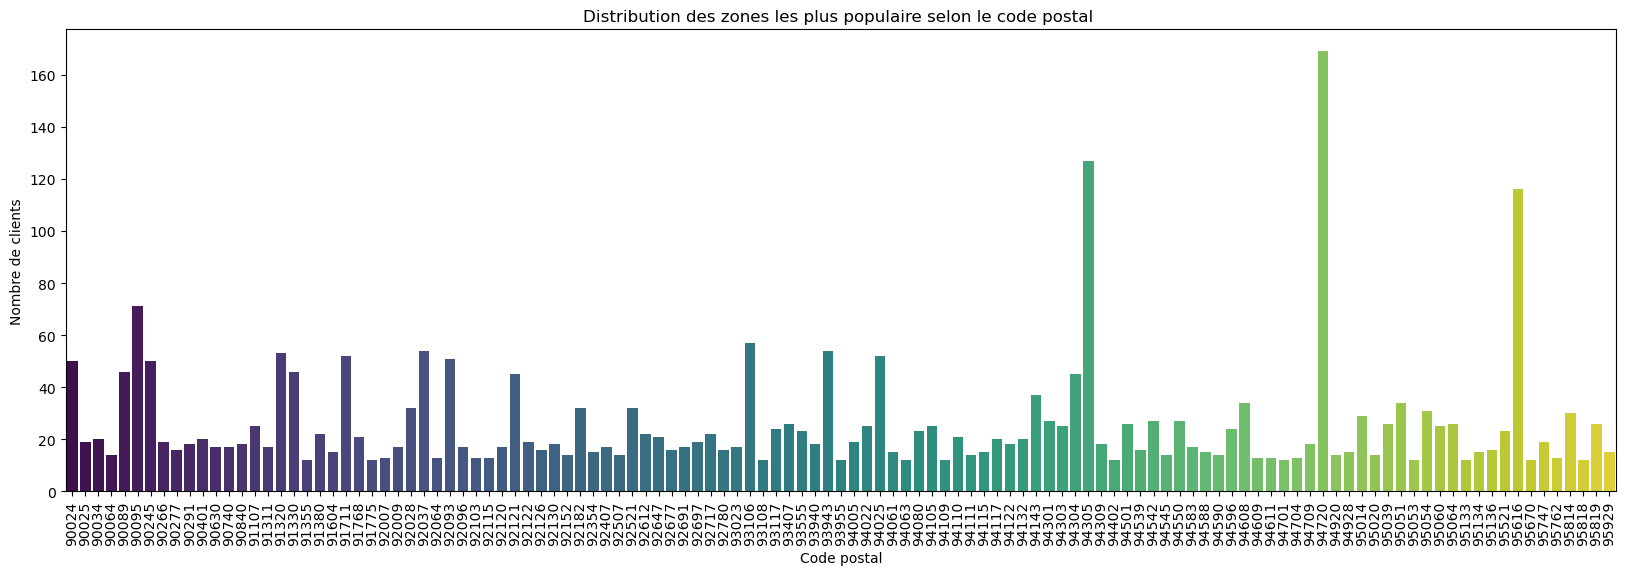

In [23]:
# Tracer le graphique à barres
plt.figure(figsize=(20, 6))

sns.barplot(data = zip_code_df[zip_code_df['count'] > 
                               round(zip_code_df['count'].mean())], 
            x='ZIP Code', 
            y='count', 
            palette='viridis'
           )

plt.xlabel('Code postal')
plt.ylabel('Nombre de clients')
plt.title('Distribution des zones les plus populaire selon le code postal ')
plt.xticks(rotation = 90, fontsize = 10)

plt.show()

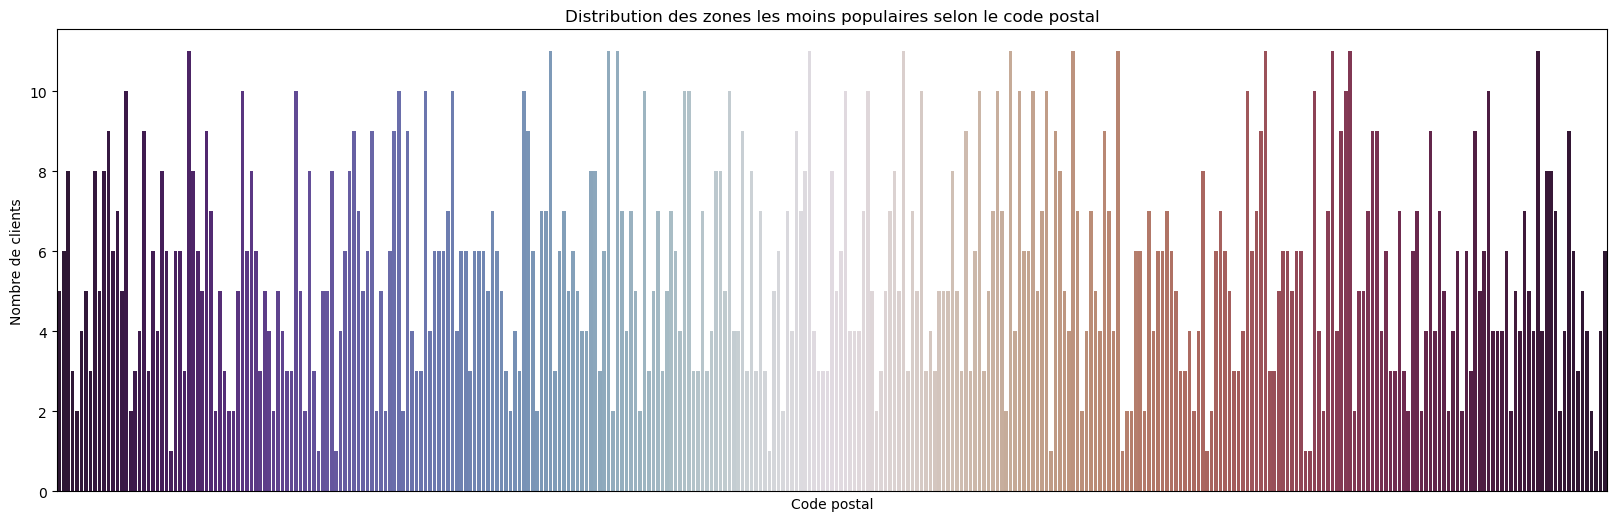

In [24]:
# Tracer le graphique à barres
plt.figure(figsize=(20, 6))


# Utiliser sns.barplot avec les données triées et filtrées
sns.barplot(data=zip_code_df[zip_code_df['count'] <= round(zip_code_df['count'].mean())], 
            y='count', 
            x='ZIP Code', 
            palette=palettes[5]
           )

# Ajouter des étiquettes et un titre
plt.xlabel('Code postal')
plt.ylabel('Nombre de clients')
plt.title('Distribution des zones les moins populaires selon le code postal')

plt.xticks([])
plt.show()

In [25]:
zip_code_grouped.sort_values(ascending=False, inplace = True)

In [26]:
zip_code_grouped.head(10)

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
dtype: int64

In [27]:
zip_code_grouped.sort_values(ascending = False).tail(10)

ZIP Code
90068    1
94404    1
90813    1
94087    1
92694    1
94970    1
94965    1
94598    1
96145    1
9307     1
dtype: int64

<i>Remarques</i>

- On constate que les 3 zones qui marquent une concentration forte des clients sont les zones avec les codes postaux : 94770, 94305 et 95616, respectivement.
- Les 10 principaux codes postaux selon la concentration des clients sont : 94720, 94305, 95616, 90095, 93106, 92037, 93943, 91320, 94025 et 91711.

## 3.4 Taille de famille 

In [28]:
df['Family'].unique()

array([4, 3, 1, 2])

In [29]:
famille_group = df.groupby('Family').size()
famille_group = pd.DataFrame({'count': famille_group}).reset_index()
famille_group.set_index(keys = 'Family')

,count
Family,
1,1472
2,1296
3,1010
4,1222


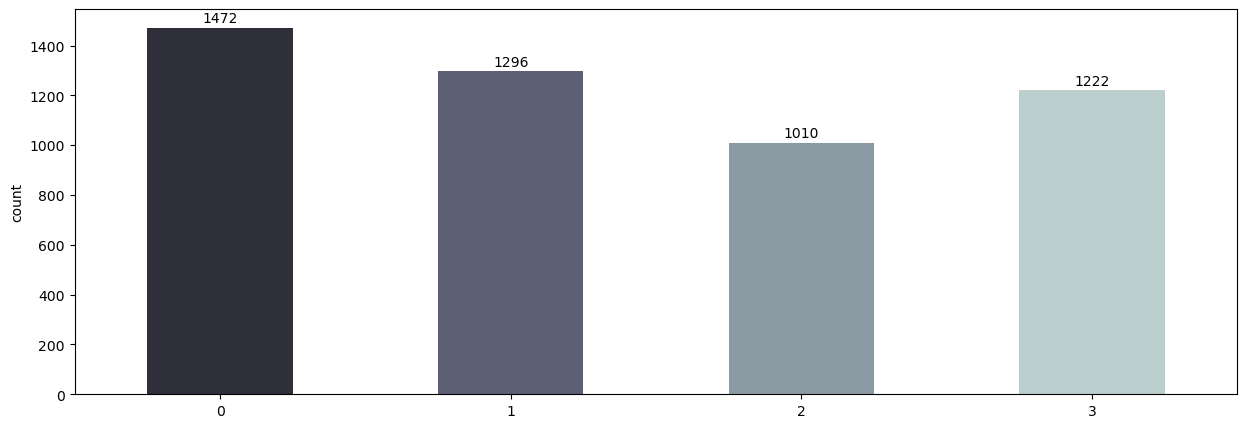

In [88]:
plt.figure(figsize=(15, 5))

sns.barplot(data=famille_group, y='count', x=famille_group.index, palette=palettes[13], width=0.5)

for index, value in enumerate(famille_group['count']):
    plt.text(index, value + 20, str(value), ha='center', fontsize=10)

plt.show()

À partir du tableau des tailles de famille que vous avez fourni :

1. Il y a 1472 familles de taille 1.
2. Il y a 1296 familles de taille 2.
3. Il y a 1010 familles de taille 3.
4. Il y a 1222 familles de taille 4.

En analysant ces données, on peut conclure que :

- La majorité des familles dans l'échantillon ont une taille de 1 ou 2.
- Les familles de taille 3 sont moins nombreuses que les familles de taille 1 ou 2, mais elles restent assez représentées.
- Les familles de taille 4 sont également assez courantes, bien qu'elles soient légèrement moins nombreuses que les familles de taille 1 ou 2.

# 4. Statistiques

## 4.1 Statistiques multivariant

### 4.1.1 Depense mensuelle selon l'age des clients

In [31]:
age_ccavg = df[subset := ['Age', 'CCAvg']]

In [32]:
age_ccavg.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0


- Pour la colonne « Age » :
  - Nous avons un échantillon de 5000 individus.
  - L'âge moyen est d'environ 45,34 ans.
  - L'écart-type est d'environ 11,46 ans, illustrant la dispersion des âges autour de la moyenne.
  - L'âge minimum est de 23 ans et l'âge maximum est de 67 ans.
  - Le premier quartile (Q1) se situe à 35 ans, indiquant que 25 % des individus ont un âge inférieur à cette valeur.
  - La médiane (Q2) est de 45 ans, ce qui signifie que 50 % des individus ont un âge inférieur à cette valeur.
  - Le troisième quartile (Q3) se situe à 55 ans, ce qui implique que 75 % des individus ont un âge inférieur à cette valeur.

- Pour la colonne « CCAvg » (dépenses moyennes sur cartes de crédit par mois) :
  - Nous avons également un échantillon de 5000 individus.
  - La dépense moyenne sur cartes de crédit par mois est d'environ 1,94M \$. 
  - L'écart-type est d'environ 1,75M \$, reflétant la dispersion des dépenses autour de la moyenne.
  - La dépense minimale est de 0,00 \$, suggérant que certains clients ne dépensent rien sur leurs cartes de crédit.
  - La dépense maximale est de 10,00M \$, illustrant les dépenses mensuelles les plus élevées observées.
  - Le premier quartile (Q1) se situe à 0,70M \$, ce qui signifie que 25 % des individus ont une dépense mensuelle inférieure à cette valeur.
  - La médiane (Q2) est de 1,50M \$, indiquant que 50 % des individus ont une dépense mensuelle inférieure à cette valeur.
  - Le troisième quartile (Q3) se situe à 2,50M \$, ce qui implique que 75 % des individus ont une dépense mensuelle inférieure à cette valeur.

Ces statistiques offrent un aperçu de la distribution et de la tendance centrale des colonnes « Age » et « CCAvg » dans votre jeu de données.

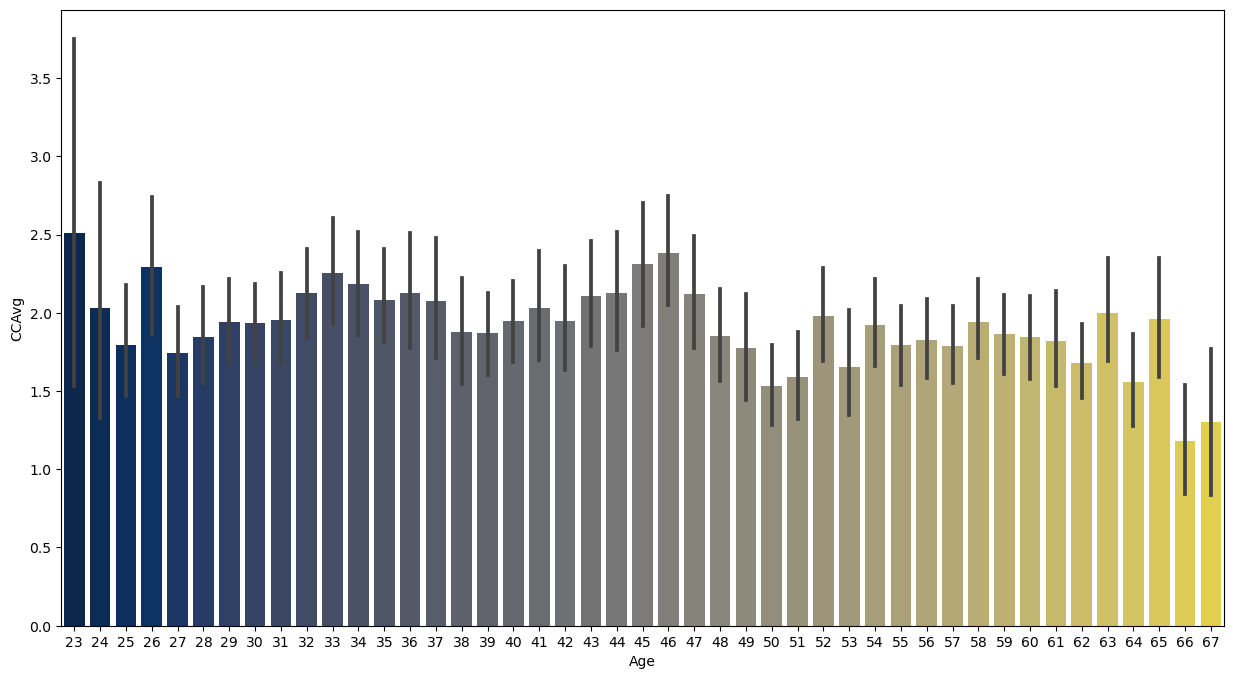

In [93]:
plt.figure(figsize = (15,8))

sns.barplot(data = age_ccavg, y = 'CCAvg', x = 'Age' ,palette=palettes[8])

plt.show()

In [53]:
def age_ccavg_tranche(dataset, decalage=10):
    """
    Détermine les dépenses mensuelles selon les tranches d'âge.

    Args:
    - dataset: DataFrame contenant les données d'âge et de dépenses mensuelles.
    - decalage: Interval utilisé pour définir les tranches d'âge. Par défaut, 10.

    Returns:
    - Liste de listes contenant les informations agrégées pour chaque tranche d'âge:
      [[nb_individu, sum_age, sum_ccavg], [,,], [,,], ...]
    """
    # Calculer le nombre de tranches
    nb_tranches = int(np.ceil(dataset['Age'].max() / decalage))
    
    # Initialiser la liste de tranches avec des zéros
    tranches = [[0, 0, 0] for _ in range(nb_tranches)]

    # Itérer à travers chaque ligne du jeu de données
    for _, row in dataset.iterrows():
        # Calculer l'index de tranche d'âge
        tranche_index = int(row['Age'] / decalage)
        
        # Mettre à jour les valeurs de la tranche
        tranches[tranche_index][0] += 1
        tranches[tranche_index][1] += row['Age']
        tranches[tranche_index][2] += row['CCAvg']

    # Calculer les moyennes pour les tranches non vides
    for _ in tranches:
        if _[0] != 0:
            _[1] = round(_[1] / _[0], 2)
            _[2] = round(_[2] / _[0], 2)

    return tranches, nb_tranches

In [59]:
age_ccavg_df, nb_tranche = age_ccavg_tranche(age_ccavg)

age_ccavg_df = pd.DataFrame(age_ccavg_df, columns=['nb_individu', 'age', 'ccavg'])

display(age_ccavg_df.T)

,0,1,2,3,4,5,6
nb_individu,0.0,0.0,488.00,1247.00,1257.00,1334.00,674.00
age,0.0,0.0,27.07,34.42,44.36,54.51,62.42
ccavg,0.0,0.0,1.94,2.05,2.06,1.79,1.78


    les tranhes sont reparties par default avec un decalage de 10 ans 

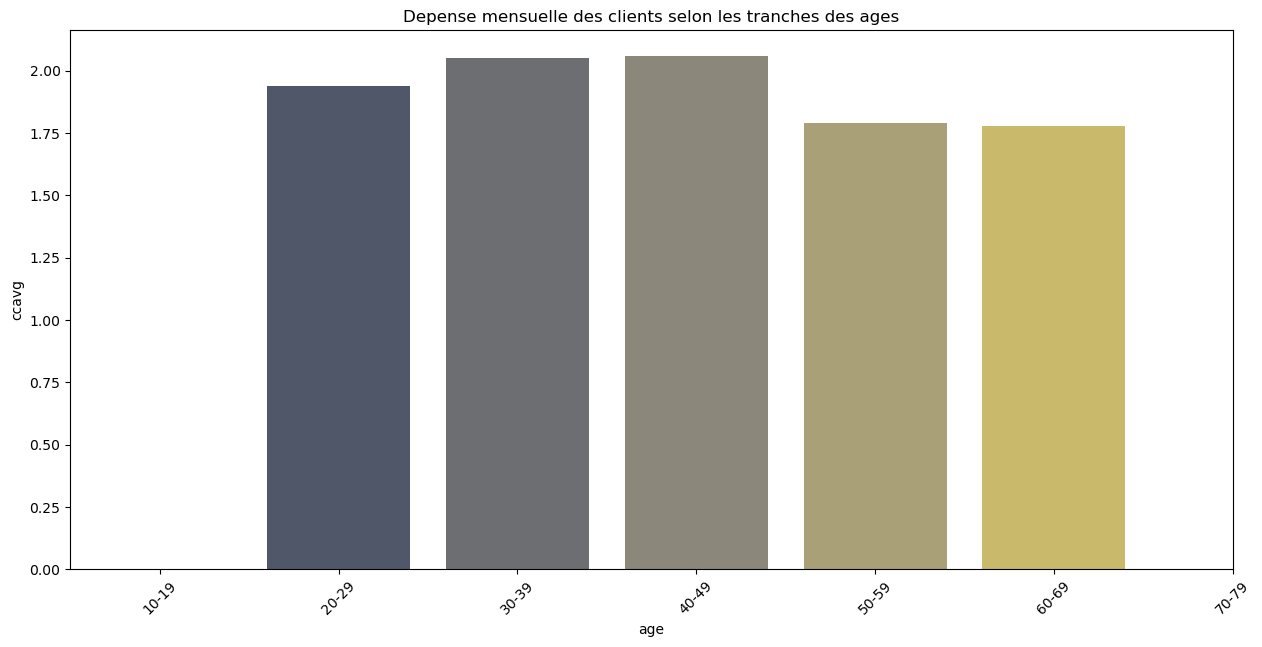

In [95]:
plt.figure(figsize=(15, 7))

# Plot the barplot
sns.barplot(data=age_ccavg_df, x='age', y='ccavg', palette=palettes[8])

plt.xticks(range(nb_tranche), [f'{(i+1)*10}-{(i+2)*10-1}' for i in range(nb_tranche)], rotation=45)

# Set the y-scale to linear
plt.yscale('linear')
plt.title('Depense mensuelle des clients selon les tranches des ages')
# Show the plot
plt.show()

<i>Remarques</i>
- Les deux premières tranches d'âge ont un nombre d'individus nul (0), ce qui indique qu'il n'y a aucun individu dans ces tranches d'âge.
- À partir de la troisième tranche d'âge, le nombre d'individus augmente progressivement, avec des pics observés dans les tranches d'âge les plus courantes, notamment dans les tranches d'âge de 35 à 44 ans.
- La moyenne d'âge varie de 27,07 ans dans la tranche d'âge la plus jeune à 62,42 ans dans la tranche d'âge la plus âgée.
- Les dépenses mensuelles moyennes sur les cartes de crédit varient de `1,78`\$ a `2,06`\$ mille, avec une légère baisse observée dans les tranches d'âge les plus âgées.

Ces remarques mettent en évidence les tendances générales de la répartition des individus en fonction de l'âge et des dépenses mensuelles moyennes sur les cartes de crédit.

### 4.1.2 Distribution des clients avec un pret personel selon leurs ages

In [100]:
loan_age = df[subset := ['Personal Loan', 'Age', 'ID']].set_index(keys = 'ID')
loan_age.head(30).T

ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Personal Loan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
Age,25,45,39,35,35,37,53,50,35,34,65,29,48,59,67,60,38,42,46,55,56,57,29,44,36,43,40,46,56,38


In [104]:
loan_age.describe().T

,count,mean,std,min,25%,50%,75%,max
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0



<i>Remarques</i>
- Pour la variable "Personal Loan" :
  - La moyenne est d'environ 0,096, ce qui suggère qu'en moyenne, environ 9,6 % des clients ont souscrit à un prêt personnel.
  - L'écart-type est d'environ 0,295, indiquant une dispersion des données autour de la moyenne.
  - La valeur minimale est de 0, ce qui signifie qu'il y a des clients qui n'ont pas souscrit à un prêt personnel.
  - Les quartiles montrent que 75 % des clients n'ont pas souscrit à un prêt personnel.

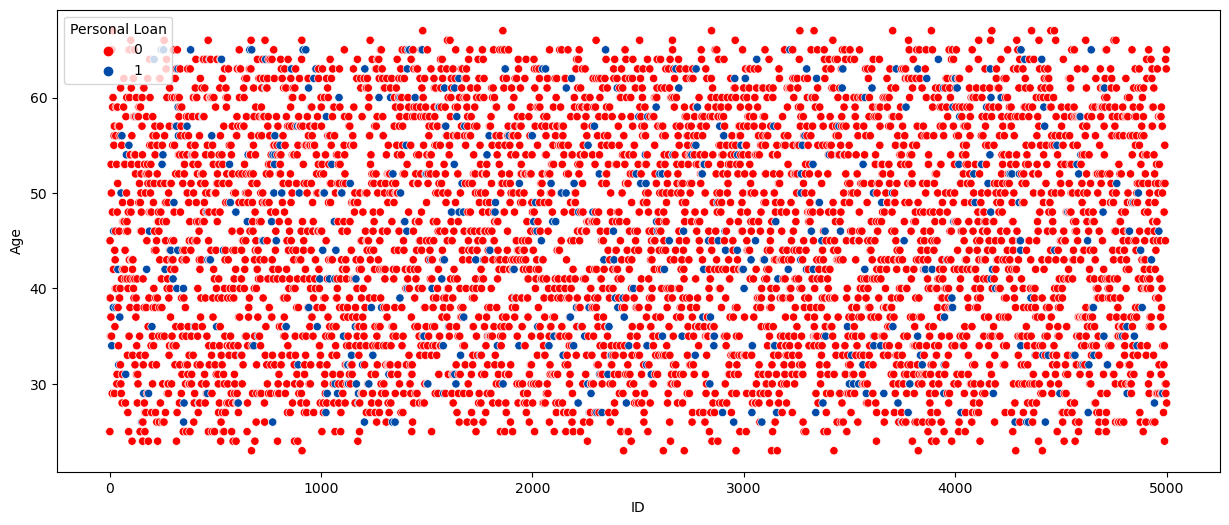

In [142]:
plt.figure(figsize = (15,6))

sns.scatterplot(data = loan_age, x = loan_age.index , y = 'Age', hue = 'Personal Loan', palette = ['red', '#004BA8'])

plt.show()

In [165]:
def age_pret_tranche(dataset, decalage=10):
    """
    Calcule la répartition des clients en fonction de leur âge et de leur souscription à un prêt personnel,
    en utilisant des tranches d'âge avec un intervalle spécifié.

    Args:
        dataset (DataFrame): Le DataFrame contenant les données des clients, y compris l'âge et la souscription au prêt personnel.
        decalage (int, optional): L'intervalle pour diviser les tranches d'âge. Par défaut, 10.

    Returns:
        tuple: Un tuple contenant deux éléments :
               - Une liste de listes représentant le nombre de clients dans chaque tranche d'âge avec et sans prêt personnel.
               - Le nombre total de tranches d'âge.
    """
    # Calculer le nombre de tranches
    nb_tranches = int(np.ceil(dataset['Age'].max() / decalage))
    
    # Initialiser la liste de tranches avec des zéros
    tranches = [[0, 0] for _ in range(nb_tranches)]

    # Itérer à travers chaque ligne du jeu de données
    for _, row in dataset.iterrows():
        # Calculer l'index de tranche d'âge
        tranche_index = int(row['Age'] / decalage)
        
        # Mettre à jour les valeurs de la tranche
        if row['Personal Loan'] == 0:
            tranches[tranche_index][0] += 1
        else:
            tranches[tranche_index][1] += 1

    return tranches, nb_tranches


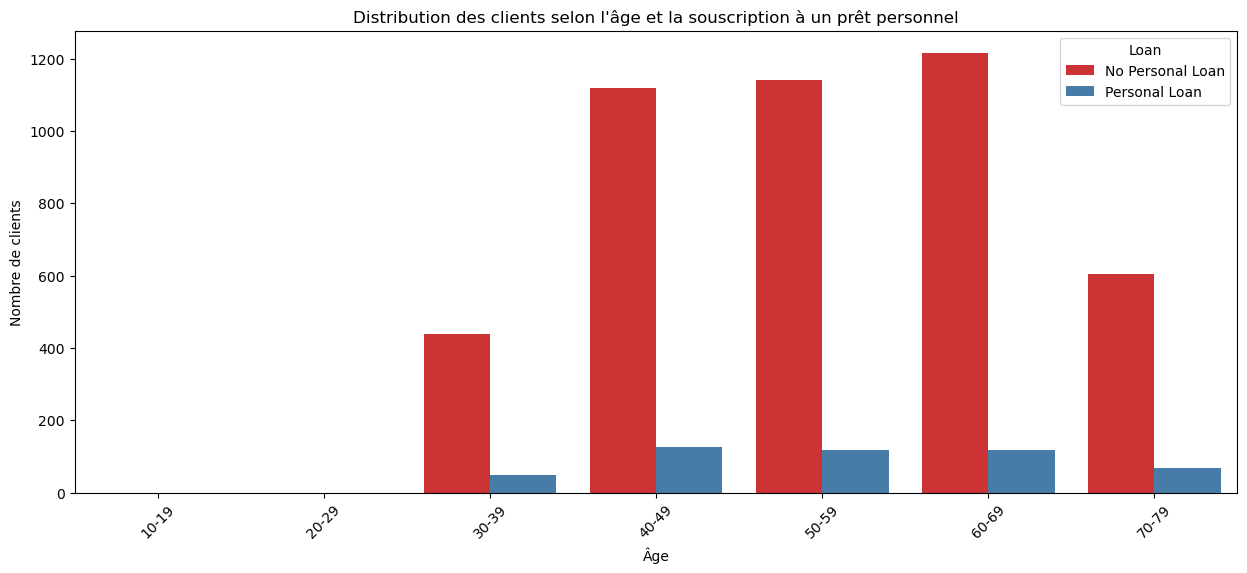

In [183]:
age_pret_data, nb_tranches = age_pret_tranche(loan_age)
age_pret_df = pd.DataFrame(age_pret_data, columns=['No Personal Loan', 'Personal Loan'])

age_pret_df['Age'] = [(i * 10) - 1 for i in range(1, nb_tranches + 1)]

# Melt le DataFrame pour le format long
age_pret_df_melted = age_pret_df.melt(id_vars='Age', var_name='Loan', value_name='Count')

# Tracer le graphique à barres
plt.figure(figsize=(15, 6))

# Tracer le graphique à barres
barplot = sns.barplot(data=age_pret_df_melted, x='Age', y='Count', hue='Loan', palette='Set1')

plt.title('Distribution des clients selon l\'âge et la souscription à un prêt personnel')
plt.xticks(range(nb_tranches), [f'{(i+1)*10}-{(i+2)*10-1}' for i in range(nb_tranches)], rotation=45)
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

- Les deux premières tranches d'âge ont un nombre nul de clients ayant souscrit à un prêt personnel, ce qui signifie qu'aucun client dans ces tranches d'âge n'a souscrit à un prêt personnel.
- À partir de la troisième tranche d'âge, on observe une augmentation du nombre de clients ayant souscrit à un prêt personnel, avec des pics dans les tranches d'âge les plus courantes.
- Les tranches d'âge les plus représentées sont celles de 35 à 44 ans, avec 1120 clients n'ayant pas souscrit à un prêt personnel et 127 clients ayant souscrit à un prêt personnel.
- Globalement, il semble y avoir plus de clients n'ayant pas souscrit à un prêt personnel que de clients ayant souscrit à un prêt personnel dans chaque tranche d'âge, bien que le nombre de clients ayant souscrit à un prêt personnel varie selon l'âge.

Ces remarques mettent en évidence la relation entre l'âge des clients et leur propension à souscrire à un prêt personnel dans votre ensemble de données.